# Import libaraies


In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# Air Quality Data Columns Explanation

- **CBSA** → Name of the urban area (e.g., Akron, OH).  
- **CBSA Code** → Unique identifier code for the CBSA (like an ID).  
- **Year** → The year of observation (e.g., 2025).  
- **Days with AQI** → Number of days with recorded AQI data.  

### AQI Categories
- **Good Days** → Number of days with AQI in the "Good" range (0–50).  
- **Moderate Days** → Number of days with AQI in the "Moderate" range (51–100).  
- **Unhealthy for Sensitive Groups Days** → Number of days with AQI in the "Unhealthy for Sensitive Groups" range (101–150).  
- **Unhealthy Days** → Number of days with AQI in the "Unhealthy" range (151–200).  
- **Very Unhealthy Days** → Number of days with AQI in the "Very Unhealthy" range (201–300).  
- **Hazardous Days** → Number of days with AQI in the "Hazardous" range (301–500).  

### Additional Statistics
- **Max AQI** → Maximum AQI value recorded during the year.  
- **90th Percentile AQI** → AQI value at the 90th percentile (i.e., 90% of days have AQI below this value).  
- **Median AQI** → Median AQI value (middle value of all recorded days).  

### Days by Dominant Pollutant
- **Days CO** → Number of days where CO (Carbon Monoxide) was the dominant pollutant.  
- **Days NO2** → Number of days where NO₂ (Nitrogen Dioxide) was the dominant pollutant.  
- **Days Ozone** → Number of days where O₃ (Ozone) was the dominant pollutant.  
- **Days PM2.5** → Number of days where PM2.5 (particles ≤ 2.5 µm) was the dominant pollutant.  
- **Days PM10** → Number of days where PM10 (particles ≤ 10 µm) was the dominant pollutant.  


In [4]:
## data

df = pd.read_csv(r"E:\NASA\AIR-quality-forecast\data\annual_aqi_by_cbsa_2025\annual_aqi_by_cbsa_2025.csv")


In [5]:
df.head(5)

,CBSA,CBSA Code,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,"Aberdeen, SD",10100,2025,87,82,5,0,0,0,0,55,44,25,0,0,0,76,11
1,"Aberdeen, WA",10140,2025,90,89,1,0,0,0,0,52,37,19,0,0,0,90,0
2,"Adrian, MI",10300,2025,90,67,23,0,0,0,0,78,60,31,0,0,0,90,0
3,"Akron, OH",10420,2025,151,109,42,0,0,0,0,84,61,43,0,0,74,77,0
4,"Albany, GA",10500,2025,151,66,84,1,0,0,0,115,70,52,0,0,0,151,0


In [7]:
df['ID'] = range(1, len(df) + 1)


In [8]:
print(df.head())


           CBSA  CBSA Code  Year  Days with AQI  Good Days  Moderate Days  \
0  Aberdeen, SD      10100  2025             87         82              5   
1  Aberdeen, WA      10140  2025             90         89              1   
2    Adrian, MI      10300  2025             90         67             23   
3     Akron, OH      10420  2025            151        109             42   
4    Albany, GA      10500  2025            151         66             84   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                    0               0                    0   
1                                    0               0                    0   
2                                    0               0                    0   
3                                    0               0                    0   
4                                    1               0                    0   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  D

In [10]:
weights = {
    'Good Days': 0,
    'Moderate Days': 1,
    'Unhealthy for Sensitive Groups Days': 2,
    'Unhealthy Days': 3,
    'Very Unhealthy Days': 4,
    'Hazardous Days': 5
}

df['IDL'] = (
    df['Good Days'] * weights['Good Days'] +
    df['Moderate Days'] * weights['Moderate Days'] +
    df['Unhealthy for Sensitive Groups Days'] * weights['Unhealthy for Sensitive Groups Days'] +
    df['Unhealthy Days'] * weights['Unhealthy Days'] +
    df['Very Unhealthy Days'] * weights['Very Unhealthy Days'] +
    df['Hazardous Days'] * weights['Hazardous Days']
)

print(df[['CBSA', 'Year', 'IDL']])


                                  CBSA  Year  IDL
0                         Aberdeen, SD  2025    5
1                         Aberdeen, WA  2025    1
2                           Adrian, MI  2025   23
3                            Akron, OH  2025   42
4                           Albany, GA  2025   86
..                                 ...   ...  ...
479                         Yakima, WA  2025   34
480                   York-Hanover, PA  2025   34
481  Youngstown-Warren-Boardman, OH-PA  2025   48
482                      Yuba City, CA  2025   27
483                           Yuma, AZ  2025   96

[484 rows x 3 columns]


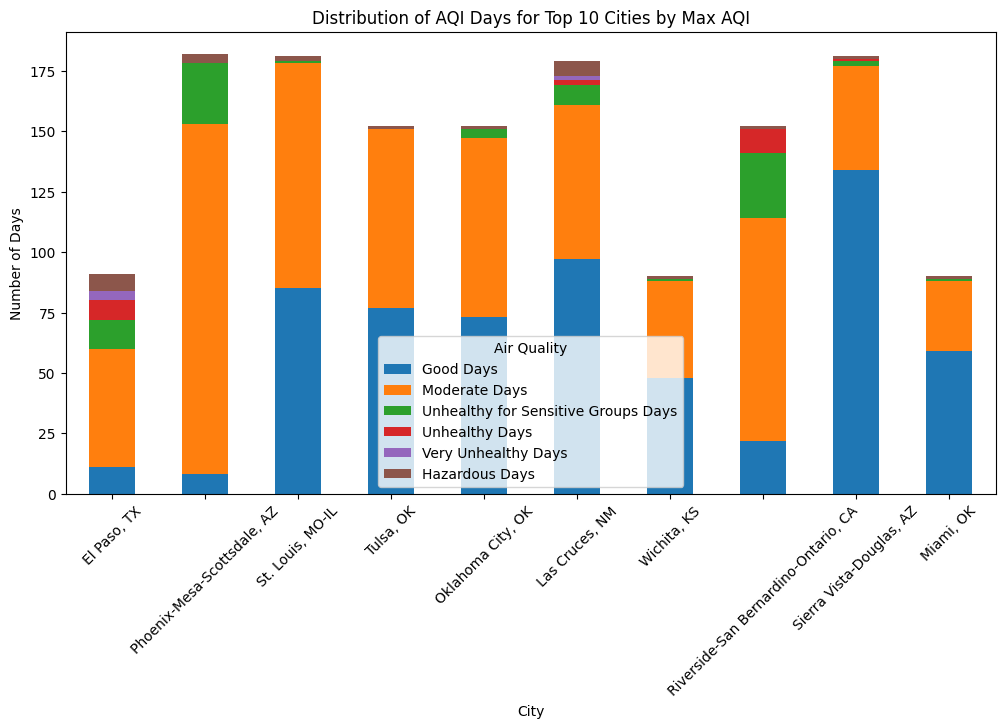

In [12]:
top_cities = df.sort_values('Max AQI', ascending=False).head(10)

top_cities.set_index('CBSA')[['Good Days','Moderate Days','Unhealthy for Sensitive Groups Days',
                               'Unhealthy Days','Very Unhealthy Days','Hazardous Days']].plot(
    kind='bar', stacked=True, figsize=(12,6)
)

plt.title("Distribution of AQI Days for Top 10 Cities by Max AQI")
plt.ylabel("Number of Days")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.legend(title="Air Quality")
plt.show()

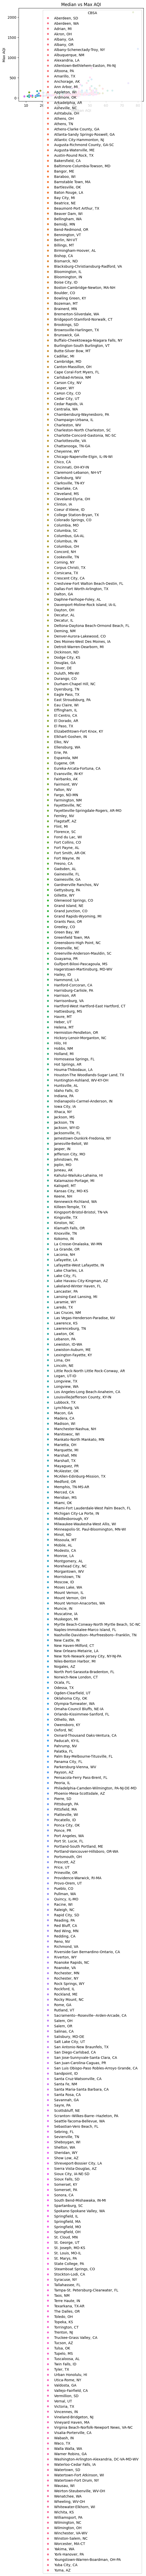

In [13]:
import seaborn as sns

sns.scatterplot(data=df, x='Median AQI', y='Max AQI', hue='CBSA')
plt.title("Median vs Max AQI")
plt.show()


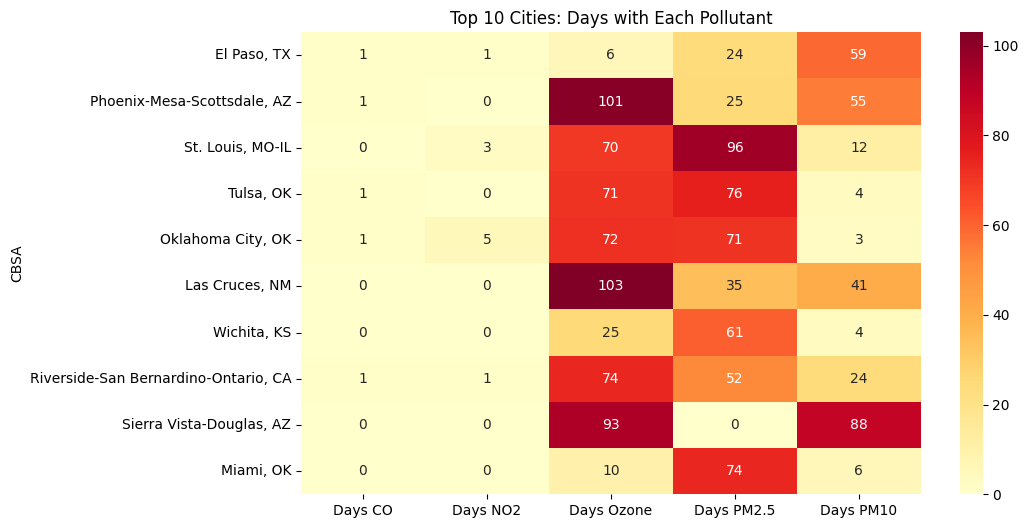

In [16]:
top_cities = df.sort_values('Max AQI', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.heatmap(
    top_cities.set_index('CBSA')[['Days CO','Days NO2','Days Ozone','Days PM2.5','Days PM10']],
    annot=True, fmt="d", cmap="YlOrRd"
)
plt.title("Top 10 Cities: Days with Each Pollutant")
plt.show()


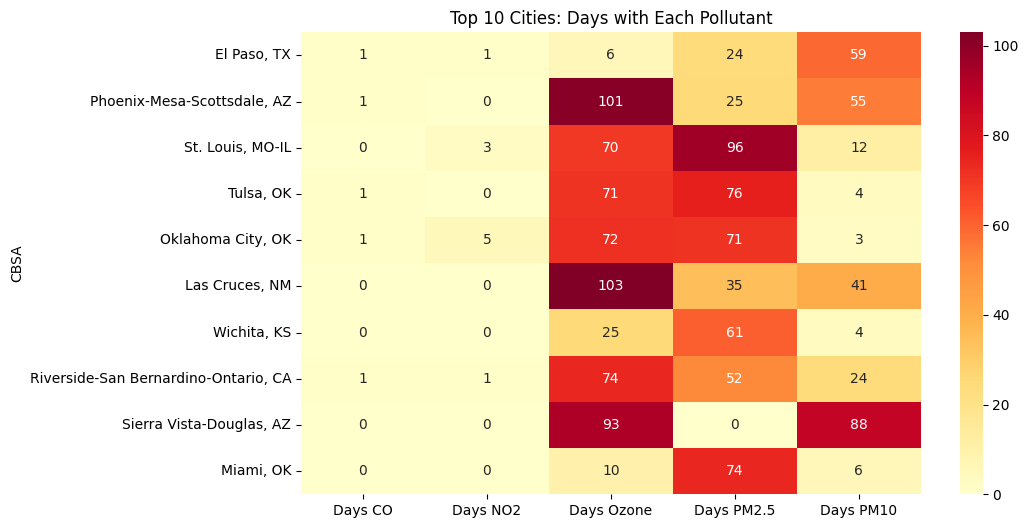

In [17]:
top_cities = df.sort_values('Max AQI', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.heatmap(
    top_cities.set_index('CBSA')[['Days CO','Days NO2','Days Ozone','Days PM2.5','Days PM10']],
    annot=True, fmt="d", cmap="YlOrRd"
)
plt.title("Top 10 Cities: Days with Each Pollutant")
plt.show()


In [21]:
import pandas as pd

df = pd.read_csv(r"E:\NASA\AIR-quality-forecast\data\annual_aqi_by_cbsa_2025\annual_aqi_by_cbsa_2025.csv")

df['ID'] = df['CBSA Code'].astype(str) + '_' + df['Year'].astype(str)

weights = {
    'Good Days': 0,
    'Moderate Days': 1,
    'Unhealthy for Sensitive Groups Days': 2,
    'Unhealthy Days': 3,
    'Very Unhealthy Days': 4,
    'Hazardous Days': 5
}

df['IDL'] = (
    df['Good Days'] * weights['Good Days'] +
    df['Moderate Days'] * weights['Moderate Days'] +
    df['Unhealthy for Sensitive Groups Days'] * weights['Unhealthy for Sensitive Groups Days'] +
    df['Unhealthy Days'] * weights['Unhealthy Days'] +
    df['Very Unhealthy Days'] * weights['Very Unhealthy Days'] +
    df['Hazardous Days'] * weights['Hazardous Days']
)

df = df.sort_values('IDL', ascending=False)

print(df[['CBSA','Year','ID','IDL','Max AQI']])


                                     CBSA  Year          ID  IDL  Max AQI
336           Phoenix-Mesa-Scottsdale, AZ  2025  38060_2025  215     1215
366  Riverside-San Bernardino-Ontario, CA  2025  40140_2025  181      365
260    Los Angeles-Long Beach-Anaheim, CA  2025  31080_2025  159      182
134                           El Paso, TX  2025  21340_2025  148     2122
117            Denver-Aurora-Lakewood, CO  2025  19740_2025  136      115
..                                    ...   ...         ...  ...      ...
405                          Show Low, AZ  2025  43320_2025    0       45
155                       Fond du Lac, WI  2025  22540_2025    0       40
402                         Sheboygan, WI  2025  43100_2025    0       41
146                            Fallon, NV  2025  21980_2025    0       48
449                 Vallejo-Fairfield, CA  2025  46700_2025    0       45

[484 rows x 5 columns]


In [22]:
daily_data = []

for idx, row in df.iterrows():
    for category in ['Good Days', 'Moderate Days', 'Unhealthy for Sensitive Groups Days',
                     'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days']:
        days = int(row[category])
        for _ in range(days):
            daily_data.append({
                'CBSA': row['CBSA'],
                'CBSA Code': row['CBSA Code'],
                'AQI_Category': category,
                'Max AQI': row['Max AQI'],
                '90th Percentile AQI': row['90th Percentile AQI'],
                'Median AQI': row['Median AQI'],
                'Days CO': row['Days CO'],
                'Days NO2': row['Days NO2'],
                'Days Ozone': row['Days Ozone'],
                'Days PM2.5': row['Days PM2.5'],
                'Days PM10': row['Days PM10']
            })

daily_df = pd.DataFrame(daily_data)
daily_df = daily_df.sample(frac=1).reset_index(drop=True)  # shuffle
print(daily_df.head())

                     CBSA  CBSA Code   AQI_Category  Max AQI  \
0          Jackson, WY-ID      27220  Moderate Days       84   
1           El Dorado, AR      20980      Good Days       70   
2               Macon, GA      31420  Moderate Days      119   
3  Parkersburg-Vienna, WV      37620      Good Days       65   
4        Fort Collins, CO      22660  Moderate Days      119   

   90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days PM2.5  \
0                   51          41        0         0         117          39   
1                   61          50        0         0           0          61   
2                   68          53        0         0          10         141   
3                   55          40        0         0          30          19   
4                   84          51        1         0         160          21   

   Days PM10  
0         21  
1          0  
2          0  
3          0  
4          0  


In [ ]:
%pip install scikit-learn

from sklearn.model_selection import train_test_split

X = daily_df.drop(columns=['AQI_Category'])
y = daily_df['AQI_Category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Note: you may need to restart the kernel to use updated packages.
Train size: 45417
Test size: 11355


In [26]:
df.head()

,CBSA,CBSA Code,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,ID,IDL
336,"Phoenix-Mesa-Scottsdale, AZ",38060,2025,182,8,145,25,0,0,4,1215,108,80,1,0,101,25,55,38060_2025,215
366,"Riverside-San Bernardino-Ontario, CA",40140,2025,152,22,92,27,10,0,1,365,136,74,1,1,74,52,24,40140_2025,181
260,"Los Angeles-Long Beach-Anaheim, CA",31080,2025,152,24,104,17,7,0,0,182,119,64,1,3,59,79,10,31080_2025,159
134,"El Paso, TX",21340,2025,91,11,49,12,8,4,7,2122,223,77,1,1,6,24,59,21340_2025,148
117,"Denver-Aurora-Lakewood, CO",19740,2025,182,51,126,5,0,0,0,115,87,58,1,10,133,33,5,19740_2025,136


In [ ]:
daily_data = []

for idx, row in df.iterrows():
    year = row['Year']
    current_day = pd.Timestamp(f'{year}-01-01')
    
    
    for category in ['Good Days', 'Moderate Days', 'Unhealthy for Sensitive Groups Days',
                     'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days']:
        days_count = int(row[category])
        for _ in range(days_count):
            daily_data.append({
                'CBSA': row['CBSA'],
                'CBSA Code': row['CBSA Code'],
                'Date': current_day,
                'AQI_Category': category,
                'Max AQI': row['Max AQI'],
                '90th Percentile AQI': row['90th Percentile AQI'],
                'Median AQI': row['Median AQI'],
                'Days CO': row['Days CO'],
                'Days NO2': row['Days NO2'],
                'Days Ozone': row['Days Ozone'],
                'Days PM2.5': row['Days PM2.5'],
                'Days PM10': row['Days PM10']
            })
            current_day += pd.Timedelta(days=1)

daily_df = pd.DataFrame(daily_data)
daily_df = daily_df.sort_values(['CBSA', 'Date']).reset_index(drop=True)

print(daily_df.head())

           CBSA  CBSA Code       Date AQI_Category  Max AQI  \
0  Aberdeen, SD      10100 2025-01-01    Good Days       55   
1  Aberdeen, SD      10100 2025-01-02    Good Days       55   
2  Aberdeen, SD      10100 2025-01-03    Good Days       55   
3  Aberdeen, SD      10100 2025-01-04    Good Days       55   
4  Aberdeen, SD      10100 2025-01-05    Good Days       55   

   90th Percentile AQI  Median AQI  Days CO  Days NO2  Days Ozone  Days PM2.5  \
0                   44          25        0         0           0          76   
1                   44          25        0         0           0          76   
2                   44          25        0         0           0          76   
3                   44          25        0         0           0          76   
4                   44          25        0         0           0          76   

   Days PM10  
0         11  
1         11  
2         11  
3         11  
4         11  


In [28]:
split_idx = int(len(daily_df) * 0.8)
train_df = daily_df.iloc[:split_idx]
test_df = daily_df.iloc[split_idx:]

print("Train size:", train_df.shape)
print("Test size:", test_df.shape)

Train size: (45417, 12)
Test size: (11355, 12)


In [ ]:
target_col = 'Max AQI'
feature_cols = [
    'Days CO', 
    'Days NO2',      
    'Days Ozone',  
    'Days PM2.5',    
    'Days PM10'     
]



In [34]:
X_train = train_df[feature_cols]
y_train = train_df[target_col]

X_test = test_df[feature_cols]
y_test = test_df[target_col]


In [39]:
import numpy as np

class TimeSeriesGenerator:
    def __init__(self, df, feature_cols, target_col, window_size=7, batch_size=64):
        self.df = df.reset_index(drop=True)
        self.feature_cols = feature_cols
        self.target_col = target_col
        self.window_size = window_size
        self.batch_size = batch_size
        self.num_samples = len(df) - window_size

    def __len__(self):
        return int(np.ceil(self.num_samples / self.batch_size))

    def __iter__(self):
        for start in range(0, self.num_samples, self.batch_size):
            end = min(start + self.batch_size, self.num_samples)
            X_batch, y_batch = [], []
            for i in range(start, end):
                X_batch.append(self.df[self.feature_cols].iloc[i:i+self.window_size].values)
                y_batch.append(self.df[self.target_col].iloc[i+self.window_size])
            yield np.array(X_batch), np.array(y_batch)


In [40]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

# ===== Dataset =====
class AQIDataset(Dataset):
    def __init__(self, df, feature_cols, target_col, window_size=7):
        self.df = df.reset_index(drop=True)
        self.feature_cols = feature_cols
        self.target_col = target_col
        self.window_size = window_size
        self.num_samples = len(df) - window_size

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        X = self.df[self.feature_cols].iloc[idx:idx+self.window_size].values.astype(np.float32)
        y = np.array(self.df[self.target_col].iloc[idx+self.window_size], dtype=np.float32)
        return torch.tensor(X), torch.tensor(y)

# ===== Parameters =====
feature_cols = ['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10']
target_col = 'Max AQI'
window_size = 7
batch_size = 32

# ===== Dataset & DataLoader =====
train_dataset = AQIDataset(train_df, feature_cols, target_col, window_size)
test_dataset = AQIDataset(test_df, feature_cols, target_col, window_size)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ===== LSTM Model =====
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=1):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # نستخدم آخر timestep
        out = self.fc(out)
        return out.squeeze()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(input_size=len(feature_cols)).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ===== Training Loop =====
epochs = 20
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X_batch.size(0)
    train_loss /= len(train_loader.dataset)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item() * X_batch.size(0)
    val_loss /= len(test_loader.dataset)

    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}")


Epoch 1/20 - Train Loss: 22080.0169 - Val Loss: 15766.0669
Epoch 2/20 - Train Loss: 17609.3984 - Val Loss: 13167.5043
Epoch 3/20 - Train Loss: 16255.4845 - Val Loss: 12867.2276
Epoch 4/20 - Train Loss: 15769.0343 - Val Loss: 12238.0004
Epoch 5/20 - Train Loss: 15521.5705 - Val Loss: 11714.3905
Epoch 6/20 - Train Loss: 15190.1433 - Val Loss: 11646.8739
Epoch 7/20 - Train Loss: 15070.1865 - Val Loss: 11542.3541
Epoch 8/20 - Train Loss: 14998.1600 - Val Loss: 11224.7654
Epoch 9/20 - Train Loss: 14910.7697 - Val Loss: 11074.0956
Epoch 10/20 - Train Loss: 14821.3471 - Val Loss: 11247.7347
Epoch 11/20 - Train Loss: 14627.8166 - Val Loss: 10920.5716
Epoch 12/20 - Train Loss: 14641.3234 - Val Loss: 10919.7044
Epoch 13/20 - Train Loss: 14579.9432 - Val Loss: 10470.7305
Epoch 14/20 - Train Loss: 14410.1132 - Val Loss: 10682.2748
Epoch 15/20 - Train Loss: 14271.2052 - Val Loss: 10659.3146
Epoch 16/20 - Train Loss: 14207.9216 - Val Loss: 10798.8809
Epoch 17/20 - Train Loss: 14141.8360 - Val Loss: 

In [ ]:
torch.save(model.state_dict(), "lstm_aqi_model.pth")

model = LSTMModel(input_size=len(feature_cols))  
model.load_state_dict(torch.load("lstm_aqi_model.pth"))
model.eval() 


C:\Users\lap shop\AppData\Local\Temp\ipykernel_26528\714373807.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("lstm_aqi_model.pth"))


LSTMModel(
  (lstm): LSTM(5, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:

model = LSTMModel(input_size=len(feature_cols))

model.load_state_dict(torch.load("lstm_aqi_model.pth"))

model.eval()


C:\Users\lap shop\AppData\Local\Temp\ipykernel_26528\1252661969.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("lstm_aqi_model.pth"))


LSTMModel(
  (lstm): LSTM(5, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [43]:
import os
print(os.getcwd())


e:\NASA\AIR-quality-forecast\Notebook


In [46]:
save_path = r"E:\NASA\AIR-quality-forecast\Model\lstm_aqi_model.pth"
torch.save(model.state_dict(), save_path)


In [47]:
import torch
import numpy as np

model = LSTMModel(input_size=len(feature_cols))
save_path = r"E:\NASA\AIR-quality-forecast\Model\lstm_aqi_model.pth"

model.load_state_dict(torch.load(save_path))
model.eval()


C:\Users\lap shop\AppData\Local\Temp\ipykernel_26528\1532679845.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(save_path))


LSTMModel(
  (lstm): LSTM(5, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
from torch.utils.data import DataLoader

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

all_preds = []
all_targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)  # تنبؤ
        all_preds.extend(y_pred.numpy())
        all_targets.extend(y_batch.numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)

for i in range(10):
    print(f"Predicted: {all_preds[i]:.2f}, Actual: {all_targets[i]:.2f}")


Predicted: 78.68, Actual: 68.00
Predicted: 127.45, Actual: 68.00
Predicted: 127.00, Actual: 68.00
Predicted: 129.54, Actual: 68.00
Predicted: 129.54, Actual: 68.00
Predicted: 129.63, Actual: 68.00
Predicted: 129.67, Actual: 68.00
Predicted: 129.66, Actual: 68.00
Predicted: 129.66, Actual: 68.00
Predicted: 129.66, Actual: 68.00


In [49]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(all_targets, all_preds)
r2 = r2_score(all_targets, all_preds)

print(f"Test MSE: {mse:.2f}")
print(f"Test R2: {r2:.2f}")


Test MSE: 10148.11
Test R2: 0.13
